# Evaluation


In [1]:
import sys
sys.path.append('../') #act as if we are one directory higher so imports work 
import torch
from latent_to_timestep_model import LTT_model
from dataset import load_data_from_dir

In [2]:
path = "/netpool/homes/connor/DiffusionModels/LD3_connor/train_data/train_data_cifar10/uni_pc_NFE20_edm_seed0"
latents, targets, conditions, unconditions = load_data_from_dir(data_folder=path, limit=200)


## LTT Model

In [29]:
model_path, steps = "/netpool/homes/connor/DiffusionModels/LD3_connor/logs/logs_cifar10/N10-val50-train450-rv12-seed0/final_ltt_model.pt", 10
model_path, steps = "/netpool/homes/connor/DiffusionModels/LD3_connor/logs/logs_cifar10/N10-val50-train50-rv12-seed0/ltt_model.pt", 10

model_path, steps = "/netpool/homes/connor/DiffusionModels/LD3_connor/logs/logs_cifar10/N10-val50-train450-rv12-seed0-fixed_scaling/final_ltt_model.pt", 10
model_path, steps  = "/netpool/homes/connor/DiffusionModels/LD3_connor/logs/logs_cifar10/N7-val50-train450-rv12-seed0-fixed_scaling/final_ltt_model.pt", 7
model_path, steps = "/netpool/homes/connor/DiffusionModels/LD3_connor/logs/logs_cifar10/N5-val50-train450-rv12-seed0-fixed_scaling/final_ltt_model.pt", 5
model_path, steps = "/netpool/homes/connor/DiffusionModels/LD3_connor/logs/logs_cifar10/N3-val50-train450-rv12-seed0-fixed_scaling/final_ltt_model.pt", 3


ltt_model = LTT_model(steps=steps)
state_dict = torch.load(model_path, weights_only=True)
ltt_model.load_state_dict(state_dict)  # Load the model state

<All keys matched successfully>

In [30]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(ltt_model))

19263404


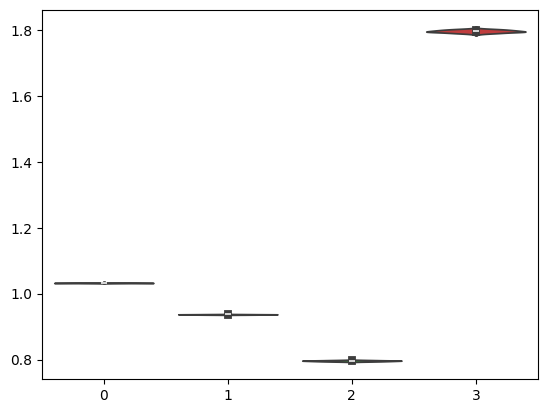

In [31]:
params_list = [ltt_model.forward(latent) for latent in latents]
params_list = torch.stack(params_list)

#visualize as violin plot over each of the 10 timesteps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

params_list = params_list.detach().numpy()
params_list = params_list.reshape(-1, steps+1)
params_list = pd.DataFrame(params_list, columns=[f"{i}" for i in range(steps+1)])
sns.violinplot(data=params_list)
plt.show()


In [32]:
params_list

,0,1,2,3
0,1.032520,0.937030,0.796390,1.796017
1,1.032961,0.936610,0.795317,1.799070
2,1.032485,0.937072,0.796480,1.795752
3,1.033579,0.936026,0.793814,1.803280
4,1.032939,0.936639,0.795373,1.798906
...,...,...,...,...
195,1.033466,0.936129,0.794086,1.802522
196,1.032638,0.936923,0.796104,1.796827
197,1.031760,0.937768,0.798248,1.790627
198,1.032535,0.937019,0.796355,1.796107
